# NLTK, Text Preprocessing and Exploratory analysis of text

Topis that are covered in this chapter:
- installing NLTK and its modules
- text preprocessing and exploratory analysis
- exploratory analysis of text
- POS tagging

# Installing NLTK and its modules

In [7]:
# installing nltk library
!pip3 install --user nltk

In [8]:
# installing numpy library
!pip3 install --user numpy

In [9]:
# import nlt library
import nltk

# download required modules (maxent_ne_chunker, punkt)
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Text preprocessing and exploratory analysis

In this part we will simply apply text preprocessing and exploratory analysis. The text preprocessing step involves tasks such as tokenization, stemming, and stop removal.
Exploratory analysis of the text data is performed to understand its main characteristics such as the main topic of the text and word frequency distributions.

# Tokenization

Word tokens are the basic units of text involved in an NLP task. The first step, when preprocessing text is to split it into tokens. 
As an example we will make use of twitter_samples provided by the NLTK library and perform simple preprocessing on it.

In [10]:
import nltk
from nltk.corpus import twitter_samples as ts

In [11]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [12]:
# explore negative tweets
negative_tweets = ts.strings('negative_tweets.json')

In [13]:
negative_tweets[:10]

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too',
 'Dang starting next week I have "work" :(',
 "oh god, my babies' faces :( https://t.co/9fcwGvaki0",
 '@RileyMcDonough make me smile :((',
 '@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln',
 'why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"',
 'Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz']

In [14]:
# explore positive tweets
positive_tweets = ts.strings('positive_tweets.json')

In [15]:
positive_tweets[:10]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [16]:
# explore tweets.20150430-223406.json file
samples_tw = ts.strings('tweets.20150430-223406.json')

In [17]:
samples_tw[:10]

['RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP',
 'VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY',
 'RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…',
 'RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http://t.co/7eIU0c5Fm1',
 "RT @thesundaypeople: UKIP's housing spokesman rakes in £800k in housing benefit from migrants.  http://t.co/GVwb9Rcb4w http://t.co/c1AZxcLh…",
 'RT @Nigel_Farage: Make sure you tune in to #AskNigelFarage tonight on BBC 1 at 22:50! #UKIP http://t.co/ogHSc2Rsr2',
 'RT @joannetallis: Ed Milliband is an embarrassment. Would you want him representing the UK?!  #bbcqt vote @Conservatives',
 "RT @abstex: The FT is backing the Tories. On an unrelated note, here's a photo of FT leader writer Jonathan Ford (next to Boris) http://t.c…",
 "RT

In [18]:
from nltk.tokenize import word_tokenize as wtoken

In [19]:
# get the first 20 words 
samples_tw[20]

"@B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!"

In [20]:
# apply tokenization on the first 10 words
wtoken(samples_tw[20])

['@',
 'B0MBSKARE',
 'the',
 'anti-Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 '.',
 'In',
 'practice',
 'most',
 'people',
 'wo',
 "n't",
 'give',
 'a',
 'toss',
 '!']

To split text based on punctuation and white spaces, NLTK provides the wordpunct_tokenize tokenizer. This will also tokenize the punctuation characters.

In [21]:
samples_tw[20]

"@B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!"

In [22]:
from nltk.tokenize import wordpunct_tokenize

In [23]:
wordpunct_tokenize(samples_tw[20])

['@',
 'B0MBSKARE',
 'the',
 'anti',
 '-',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 '.',
 'In',
 'practice',
 'most',
 'people',
 'won',
 "'",
 't',
 'give',
 'a',
 'toss',
 '!']

As we can see, some of the words between hypens are also tokenized as well as other punction mark compared to word_tokenize. We can as well build custom tokenizers using NLTK's regular expression tokenizer

In [24]:
from nltk import regexp_tokenize

In [25]:
patn = '\w+'

In [26]:
regexp_tokenize(samples_tw[20], patn)

['B0MBSKARE',
 'the',
 'anti',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 'In',
 'practice',
 'most',
 'people',
 'won',
 't',
 'give',
 'a',
 'toss']

The preceding regex pattern detects a word containing only alphanumeric characters. As another example, we will use a regular expression that detects words along with a few punctuation characters

In [27]:
patn = '\w+|[!,\-,]'

In [28]:
regexp_tokenize(samples_tw[20], patn)

['B0MBSKARE',
 'the',
 'anti',
 '-',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 'In',
 'practice',
 'most',
 'people',
 'won',
 't',
 'give',
 'a',
 'toss',
 '!']

By changing the regexp pattern to include punctuation marks, we were able to tokenize the characters in the result through the tokens ! and - being presented in the resulting Python list.

# Stemming

Stemming is a text preprocessing task for transforming related or similar variants of a word to its base form as they share the same meaning. One of the basic transformation stemming actions is to reduce a plural word to its singular form (e.g. apples to apple, oranges to orange).

We will illustrate this using the popular Porter stemmer by Martin Porter.

In [29]:
import nltk

In [30]:
from nltk.stem import PorterStemmer

In [31]:
stemming = PorterStemmer()

In [32]:
stemming.stem("enjoying")

'enjoy'

In [33]:
stemming.stem("enjoys")

'enjoy'

In [34]:
stemming.stem("enjoyable")

'enjoy'

In [35]:
stemming.stem("playing")

'play'

In [36]:
stemming.stem("shouting")

'shout'

In this case, stemming has reduced the different verb "enjoying" to its current form "enjoy" and adjective "enjoyable" to its current form "enjoy". The Porter algorithm used by the stemmer utilizes various language-specific rules (in this case English) to arrive at the stem words.

One of these rules is removing suffixes sush as "-ing", "able". Stemming does not always produce a stem that is a word by itself, this can be seen in the following example:

In [37]:
stemming.stem("variation")

'variat'

In [38]:
stemming.stem("variate")

'variat'

The generated form "variat" is not an English word. The nltk.stem.snowball module includes the snowball stemmers for other different languages, such as French, Spanish, German and so on. Snowball is a stemming language that can be used to create standard rules for stemming in different languages.

Just as with tokenizers, we can create custom stemmers using regular expressions:

In [39]:
from nltk.stem.regexp import RegexpStemmer

In [41]:
regexp_stemmer = nltk.stem.RegexpStemmer('able$|ing$',min=4)

In [43]:
regexp_stemmer.stem('flyable')

'fly'

In [44]:
regexp_stemmer.stem('flying')

'fly'

The regex pattern 'able$|ing', removes the suffixes able and ing, if present in a word and min specifies the minimum lenght of a stemmed word.

# Removing stop words

Words in English such as 'the', 'is', 'he', 'an' and so on are generally called stop words. Stop word removal is another common preprocessing step for an NLP application. In this step, we remove words that do not signify any importance to the document such as grammar articles and pronouns.

They do not have any impact to an NLP application such as text classification or search.

In [46]:
from nltk.corpus import stopwords

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dacy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
eng_stopwords = stopwords.words('english')

In [54]:
# The preceding code only shows a sample of stop words in English
eng_stopwords[20:40]

['himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this']

In [52]:
example_text = "This is an example sentence to test stopwords"

In [55]:
example_text_without_stopwords = [word for word in example_text.split() if word not in eng_stopwords]

In [56]:
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords']

Looking at the preceding code we can see that our example_text filtered out words occured in the dictionary of english stopwords. NLTL provides stop word corpora for 21 languages, in addition to those for the English language.

In [58]:
ro_stopwords = stopwords.words('romanian')

In [59]:
ro_stopwords[20:40]

['acestui',
 'aceşti',
 'aceştia',
 'adica',
 'ai',
 'aia',
 'aibă',
 'aici',
 'al',
 'ala',
 'ale',
 'alea',
 'alt',
 'alta',
 'altceva',
 'altcineva',
 'alte',
 'altfel',
 'alti',
 'altii']

In [60]:
from nltk.corpus import gutenberg

In [61]:
words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')

In [63]:
words_in_hamlet_without_eng_stopwords = [word for word in words_in_hamlet if word not in eng_stopwords]

In [67]:
words_in_hamlet_without_eng_stopwords[:200]

['[',
 'The',
 'Tragedie',
 'Hamlet',
 'William',
 'Shakespeare',
 '1599',
 ']',
 'Actus',
 'Primus',
 '.',
 'Scoena',
 'Prima',
 '.',
 'Enter',
 'Barnardo',
 'Francisco',
 'two',
 'Centinels',
 '.',
 'Barnardo',
 '.',
 'Who',
 "'",
 '?',
 'Fran',
 '.',
 'Nay',
 'answer',
 ':',
 'Stand',
 '&',
 'vnfold',
 'selfe',
 'Bar',
 '.',
 'Long',
 'liue',
 'King',
 'Fran',
 '.',
 'Barnardo',
 '?',
 'Bar',
 '.',
 'He',
 'Fran',
 '.',
 'You',
 'come',
 'carefully',
 'vpon',
 'houre',
 'Bar',
 '.',
 "'",
 'Tis',
 'strook',
 'twelue',
 ',',
 'get',
 'thee',
 'bed',
 'Francisco',
 'Fran',
 '.',
 'For',
 'releefe',
 'much',
 'thankes',
 ':',
 "'",
 'Tis',
 'bitter',
 'cold',
 ',',
 'And',
 'I',
 'sicke',
 'heart',
 'Barn',
 '.',
 'Haue',
 'quiet',
 'Guard',
 '?',
 'Fran',
 '.',
 'Not',
 'Mouse',
 'stirring',
 'Barn',
 '.',
 'Well',
 ',',
 'goodnight',
 '.',
 'If',
 'meet',
 'Horatio',
 'Marcellus',
 ',',
 'Riuals',
 'Watch',
 ',',
 'bid',
 'make',
 'hast',
 '.',
 'Enter',
 'Horatio',
 'Marcellus',
 '.

In [68]:
len(words_in_hamlet)

37360

In [65]:
len(words_in_hamlet_without_eng_stopwords)*100.0 / len(words_in_hamlet)

69.26124197002142

The preceding example shows that a significant percentage (~30%) of the text in Shakespeare's Hamlet is formed of stop words. In many of the NLP tasks these stopwords do not have much significance and therefore are removed during the preprocessing step.

# Exploratory analysis of text

Once we have tokenized the data, the next step is to perform counting of words or tokens and check their distributions in a document. This will enable us to know more about the main topics in the document.

In [70]:
import nltk

In [71]:
from nltk.corpus import webtext

In [72]:
webtext_sentences = webtext.sents('firefox.txt')

In [73]:
webtext_words = webtext.words('firefox.txt')

In [74]:
len(webtext_sentences)

1142

In [75]:
len(webtext_words)

102457

Here 'firefox.txt' refers to text related to Firefox discussion forum, though the web text data has other data as well such as advertisments and movie script text.

In [76]:
webtext_sentences

[['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.'], ['[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.'], ...]

In [77]:
webtext_words

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

Here len(webtext.sents()) gives us the number of sentences in a given text while len(webtext.words()) gives us the number of words in text

To get the frequency distribution of the words in the text, we can utilize the nltk.FreqDist() function provided by NLTK, which obtains the top words used in the text. This will give us a brief idea of the main topic in the text data.

In [84]:
frequency_dist = nltk.FreqDist(webtext_words)

In [79]:
sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[0:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

This gives us the top 30 words used in the text, though it is obvious that some of the stop words such as 'the', frequently occured. Another observation, we can see that word 'Firefox' appeared because the text we used for analysis comes from a discussion form about the Firefox browser.

We can look as well at the frequency distribution of words with a length greater than 3, which will exclude words such as 'the' and 'is'

In [80]:
large_words = dict([(key, val) for key,val in frequency_dist.items() if len(key)>3])

In [87]:
frequency_dist = nltk.FreqDist(large_words)

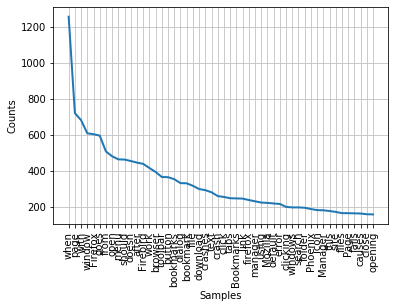

In [89]:
frequency_dist.plot(50, cumulative=False)

Here we have filtered all words that have a length greater than 3 and created a dictionary of word-frequency tuples. This will be passed to the NLTK frequency distribution plot.

The generated plot shows the frequency for the top 50 words. From the frequency distribution we can generate a word cloud, to get an intuitive visualization of the words used in the text.

In [91]:
!pip3 install wordcloud --user

  Using cached https://files.pythonhosted.org/packages/ae/af/849edf14d573eba9c8082db898ff0d090428d9485371cc4fe21a66717ad2/wordcloud-1.5.0-cp36-cp36m-manylinux1_x86_64.whl


In [92]:
from wordcloud import WordCloud

In [93]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

In [94]:
import matplotlib.pyplot as plt

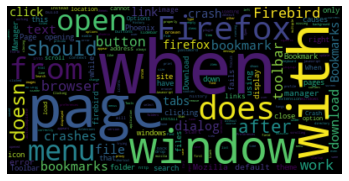

In [96]:
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In the preceding code, we passed in the frequency distribution of words that have the length larger than 3 characters obtained earlier. The wordcloud illustrates the distribution and the count of words.

Lets illustrate the frequency distribution in a wordcloud by filtering out the english stop words.

In [97]:
words_in_webtext_without_eng_stopwords = [word for word in webtext_words if word not in eng_stopwords]

In [98]:
'when' in words_in_webtext_without_eng_stopwords

False

In [99]:
'from' in words_in_webtext_without_eng_stopwords

False

In [110]:
# define punctuation
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

In [111]:
no_punction = ''
words_in_webtext_without_punctuation = [word for word in words_in_webtext_without_eng_stopwords if word not in punctuations]

In [112]:
freq_dist = nltk.FreqDist(words_in_webtext_without_punctuation)

In [113]:
wordcloud = WordCloud().generate_from_frequencies(freq_dist)

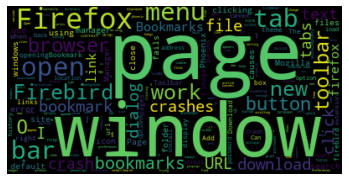

In [115]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# POS Tagging

We have analyzed some of the basic NLP preprocessing tasks such as tokenization, stemming, and stop word removal. We have also explored how to determine and visualize word distribution in a text corpus.

In this section, we will get deeper into NLTK by looking at POS tagging.

POS refers to categorizing the words in a sentence into a specific syntactic or grammatical functions. The main parts of speech in English are: nouns, pronouns, adjectives, verbs, adverbs, prepositions, determiners and conjunctions.

POS tagging is the task of attaching one of these categories to each of the words or tokens in the text. The most common tagged datasets in NLTK are the Penn Treebank and Brown Corpus.

Penn Trebank consist of parsed collection from journal articles, telephone conversations, etc.

Brown Corpus consist of text from 15 different categories of articles (science, politics, religion, sports, etc)

In [116]:
from nltk.corpus import brown

In [117]:
brown.tagged_words()[30:40]

[('term-end', 'NN'),
 ('presentments', 'NNS'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('Executive', 'JJ-TL'),
 ('Committee', 'NN-TL'),
 (',', ','),
 ('which', 'WDT'),
 ('had', 'HVD')]

In [118]:
brown.tagged_words(tagset='universal')[30:40]

[('term-end', 'NOUN'),
 ('presentments', 'NOUN'),
 ('that', 'ADP'),
 ('the', 'DET'),
 ('City', 'NOUN'),
 ('Executive', 'ADJ'),
 ('Committee', 'NOUN'),
 (',', '.'),
 ('which', 'DET'),
 ('had', 'VERB')]

# Application of POS tagging

POS tagging finds applications in NER (Named Entity Recognition), sentiment analysis, question answering and word sense disambiguation.

For the given sentence "I left the room" and "Left of the room", the word "left" conveys different meanings. A POS tagger would help differentiate between the two meanings of the word left.

In [119]:
import nltk

In [120]:
sentence1 = nltk.word_tokenize("I left the room")

In [121]:
sentence2 = nltk.word_tokenize("Left of the room")

In [122]:
nltk.pos_tag(sentence1, tagset='universal')

[('I', 'PRON'), ('left', 'VERB'), ('the', 'DET'), ('room', 'NOUN')]

In [123]:
nltk.pos_tag(sentence2, tagset='universal')

[('Left', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('room', 'NOUN')]

In the first example, the word 'left' is a verb, whereas in the second sentence 'left' is a noun. In NER, POS tagging helps in identifying a person, or location based on the tags. NLTK provides a built-in classifier that can identify entities in text, which works on top of the POS tagged sentences.

In [125]:
import nltk

In [126]:
example_sent = nltk.word_tokenize("The company is located in South Africa")

In [127]:
example_sent

['The', 'company', 'is', 'located', 'in', 'South', 'Africa']

In [130]:
tagged_sent = nltk.pos_tag(example_sent, tagset='universal')

In [131]:
tagged_sent

[('The', 'DET'),
 ('company', 'NOUN'),
 ('is', 'VERB'),
 ('located', 'VERB'),
 ('in', 'ADP'),
 ('South', 'NOUN'),
 ('Africa', 'NOUN')]

In [134]:
tree_chunk = nltk.ne_chunk(tagged_sent)

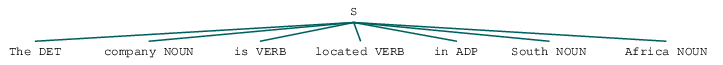

In [135]:
tree_chunk

The ne_chunk() function uses the trained named entity chunker to identify 'South Africa' as a geopolical entity (GPE)